# Test PCA on DF

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/adult_data_RenameCol_MinMax_LE.csv',index_col = 0)
df
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

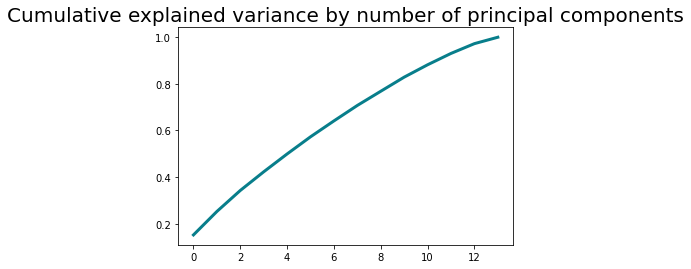

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [6]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
age,0.415723,0.133858,0.443291,0.187630,-0.432993,-0.020834,0.151640,-0.037117,0.334982,-0.166376,0.094932,0.436613,0.073166,0.142847
fnlwgt,-0.056744,0.159455,-0.194104,0.195512,0.525424,0.168615,0.671753,-0.308545,0.052208,-0.164998,0.039167,0.113425,-0.013623,-0.002433
education-num,0.330626,-0.716646,0.031649,0.142682,0.153687,-0.028510,-0.017422,0.035353,0.130185,-0.009672,-0.200388,0.075496,-0.513104,0.060234
capital-gain,0.212462,-0.169410,0.030000,0.248665,-0.104751,0.613927,0.244545,0.607352,-0.114897,0.032665,0.078402,-0.131852,0.093229,-0.020440
capital-loss,0.151385,-0.065817,0.071281,0.053050,0.093832,-0.772686,0.364571,0.442923,-0.102273,-0.012289,0.082710,-0.085771,0.071552,-0.005148


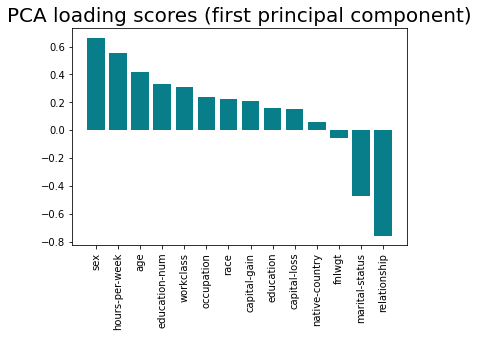

In [9]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()